In [1]:
import pandas as pd

In [4]:
tr1 = pd.read_csv("./csv/transaction_1.csv")
tr2 = pd.read_csv("./csv/transaction_2.csv")
tr3 = pd.read_csv("./csv/transaction_detail_1.csv")
tr4 = pd.read_csv("./csv/transaction_detail_2.csv")


In [5]:
tr1 =pd.concat([tr1,tr2],axis = 0 , ignore_index= True)

In [6]:
tr2 = pd.concat([tr3,tr4], axis = 0 , ignore_index= True)

In [7]:
joint_t = pd.merge(tr1,tr2, on = "transaction_id", how = "inner")

joint_t.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


In [9]:
joint_t["payment_date"] = pd.to_datetime(joint_t["payment_date"])

In [10]:
joint_t["payment_date"]

0      2019-02-01 01:36:57
1      2019-02-01 01:37:23
2      2019-02-01 02:34:19
3      2019-02-01 02:47:23
4      2019-02-01 04:33:46
               ...        
7139   2019-07-31 21:20:44
7140   2019-07-31 21:52:48
7141   2019-07-31 23:35:25
7142   2019-07-31 23:39:35
7143   2019-07-31 23:41:38
Name: payment_date, Length: 7144, dtype: datetime64[ns]

In [11]:
cm = pd.read_csv("./csv/customer_master.csv")
im = pd.read_csv("./csv/item_master.csv")

In [13]:
td = pd.merge(joint_t,cm, on = "customer_id", how = "left")

In [14]:
td = pd.merge(td,im,on="item_id",how="left")

In [15]:
td.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000


In [20]:
td["total_price"] = td["quantity"] * td["item_price"]
td.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total price,payment_month,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,2019-02,210000


In [17]:
td["payment_month"] = td["payment_date"].dt.strftime("%Y-%m")
td.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,2019-02


In [21]:
gr_d = td.groupby("payment_month").sum()["total_price"]
gr_d

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: total_price, dtype: int64

In [22]:
import matplotlib.pyplot as plt

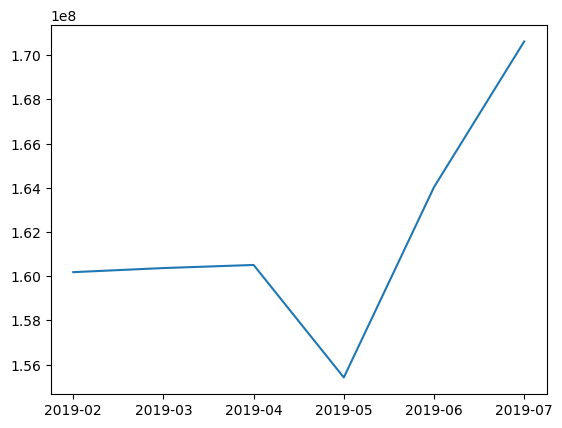

In [25]:


plt.plot(gr_d)
plt.show()

In [26]:
dr = pd.read_csv("./csv/drinks.csv")

In [27]:
dr.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [28]:
dr["continent"] = dr["continent"].fillna("OT")

In [30]:
re = dr.groupby("continent").agg(["mean","sum","min","max"])["spirit_servings"]
re

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32016\130199767.py:1: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  re = dr.groupby("continent").agg(["mean","sum","min","max"])["spirit_servings"]


,mean,sum,min,max
continent,,,,
AF,16.339623,866,0,152
AS,60.840909,2677,0,326
EU,132.555556,5965,0,373
OC,58.437500,935,0,254
OT,165.739130,3812,68,438
SA,114.750000,1377,25,302


In [31]:
means = re["mean"]
min = re["min"]
max = re["max"]
sum = re["sum"]

x = re.index

In [32]:
x

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [33]:
import matplotlib.pyplot as plt

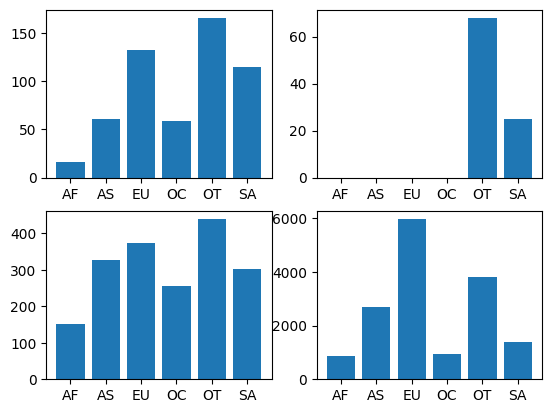

In [36]:
plt.subplot(2,2,1)
plt.bar(x,means)
plt.subplot(2,2,2)
plt.bar(x,min)
plt.subplot(2,2,3)
plt.bar(x,max)
plt.subplot(2,2,4)
plt.bar(x,sum)
plt.show()


In [37]:
tm = dr["total_litres_of_pure_alcohol"].mean()
tm

4.717098445595855

In [38]:
mc = dr.groupby("continent").mean()["total_litres_of_pure_alcohol"]
mc

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [39]:
mc[mc >= tm]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [40]:
import numpy as np

In [41]:
cnt = len(x)
cnt

6

In [43]:
index = np.arange(cnt)
index

array([0, 1, 2, 3, 4, 5])

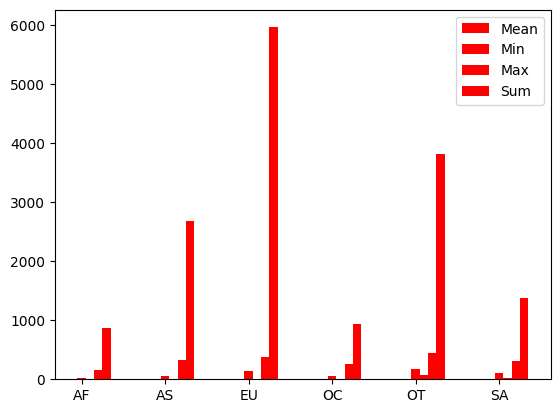

In [48]:
from cProfile import label


bar_width = 0.1

plt.bar(index,means,bar_width,color="r",label="Mean")
plt.bar(index+bar_width,min,bar_width,color="r",label="Min")
plt.bar(index+bar_width*2,max,bar_width,color="r",label="Max")
plt.bar(index+bar_width*3,sum,bar_width,color="r",label="Sum")


plt.xticks(index,x)
plt.legend()

plt.show()

In [49]:
import pandas as pd
import os

In [50]:
pd.read_csv("./csv/2017/201701_expense_list.csv")

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000
2,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000
3,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000
4,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,15513286,2017년 1월 서울시본청_경제진흥본부_경제기획관_투자유치과 업무추진비 내역,http://opengov.seoul.go.kr/public/15513286,서울시본청,경제진흥본부,경제기획관,투자유치과,NaN,2017,1,NaN,NaN,NaN,경제진흥본부 투자유치과,2017-01-11 13:01,차이79 종로구 새문안로5길,금융기관 보조금 지원계획수립관련 간담회 개최 비용지출,투자유치과장외5명,카드,27000
5513,15513286,2017년 1월 서울시본청_경제진흥본부_경제기획관_투자유치과 업무추진비 내역,http://opengov.seoul.go.kr/public/15513286,서울시본청,경제진흥본부,경제기획관,투자유치과,NaN,2017,1,NaN,NaN,NaN,경제진흥본부 투자유치과,2017-01-06 12:58,강가 서울 중구 세종대로136,핀테크 산업지원시설 입주 관련 간담회 개최비용지출,금융협력관외6명,카드,70000
5514,15513286,2017년 1월 서울시본청_경제진흥본부_경제기획관_투자유치과 업무추진비 내역,http://opengov.seoul.go.kr/public/15513286,서울시본청,경제진흥본부,경제기획관,투자유치과,NaN,2017,1,NaN,NaN,NaN,경제진흥본부 투자유치과,2017-01-04 12:47,이복만두 중구 무교동 27,F사 투자유치 협의를 위한 간담회 개최 비용지출,투자유치과장외4명,카드,57000
5515,15513286,2017년 1월 서울시본청_경제진흥본부_경제기획관_투자유치과 업무추진비 내역,http://opengov.seoul.go.kr/public/15513286,서울시본청,경제진흥본부,경제기획관,투자유치과,NaN,2017,1,NaN,NaN,NaN,경제진흥본부 투자유치과,2017-01-03 12:42,불고기브라더스 중구 태평로 1가,핀테크사업 전략수립을 위한 간담회 개최비용지출,경제진흥본부장외10명,카드,152400


In [51]:
files = os.listdir("./csv/2017")
files

['201701_expense_list.csv',
 '201702_expense_list.csv',
 '201703_expense_list.csv',
 '201704_expense_list.csv',
 '201705_expense_list.csv',
 '201706_expense_list.csv',
 '201707_expense_list.csv',
 '201708_expense_list.csv',
 '201709_expense_list.csv',
 '201710_expense_list.csv',
 '201711_expense_list.csv',
 '201712_expense_list.csv']

In [53]:
df_2017 = pd.DataFrame()

path = "./csv/2017/"

for file in files:
    df = pd.read_csv(path + file)
    df_2017 = pd. concat([df_2017,df], axis = 0 , ignore_index= True)

In [56]:
df_2017.head(2)

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [57]:
files = os.listdir("./csv/2018")

df_2018 = pd.DataFrame()

path = "./csv/2018/"

for file in files:
    df = pd.read_csv(path + file)
    df_2018 = pd.concat([df_2018,df],axis=0, ignore_index=True)

In [58]:
td = pd.concat([df_2017,df_2018],axis=0, ignore_index= True)

In [59]:
td.tail()

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
142345,17400394,2018년 12월 서울시본청 행정국 총무과 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/17400394,서울시본청,행정국,총무과,NaN,NaN,2018,12,NaN,NaN,시정 관련 간담회 등,행정국 총무과,2018-12-05 09:22,파리크라상／인사동,시정 주요사업 추진점검 관련 간담회,시장 외 8명,카드,147000
142346,17400394,2018년 12월 서울시본청 행정국 총무과 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/17400394,서울시본청,행정국,총무과,NaN,NaN,2018,12,NaN,NaN,현업-우수부서 격려 등,행정국 총무과,2018-12-04 13:50,（주）미스터피자 청,노동존중특별시 서울 2018 실행계획 추진관련 노고직원 격려,일자리노동정책관 외 70명,카드,1228100
142347,17400394,2018년 12월 서울시본청 행정국 총무과 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/17400394,서울시본청,행정국,총무과,NaN,NaN,2018,12,NaN,NaN,시정 관련 간담회 등,행정국 총무과,2018-12-04 12:55,안국교자,시정 정책 의견수렴 간담회,시장 외 5명,카드,150000
142348,17400394,2018년 12월 서울시본청 행정국 총무과 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/17400394,서울시본청,행정국,총무과,NaN,NaN,2018,12,NaN,NaN,시정 관련 간담회 등,행정국 총무과,2018-12-01 13:30,달인청국장,시정 정책 지역협력 간담회,시장 외 12명,카드,280000
142349,17400394,2018년 12월 서울시본청 행정국 총무과 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/17400394,서울시본청,행정국,총무과,NaN,NaN,2018,12,NaN,NaN,시정 관련 간담회 등,행정국 총무과,2018-12-01 08:45,종가집설렁탕,시정 정책 지역협력 간담회,시장 외 9명,카드,180000


In [60]:
len(td)

142350

In [61]:
pd.read_json("./csv/2019/201901_expense_list.json")

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,17506661,2019년1월 국제교류담당관 업무추진비 내역,http://opengov.seoul.go.kr/public/17506661,서울시본청,기획조정실,국제교류담당관,,,2019,1,NaN,NaN,,기획조정실 국제교류담당관,2019-01-31 19:57,구이구이 서울특별시 중구 을지로 6,도시외교 기본계획 개선관련 연구용역 및 협력방안 논의 간담회,국제교류담당관 등 6명,카드,143000
1,17506661,2019년1월 국제교류담당관 업무추진비 내역,http://opengov.seoul.go.kr/public/17506661,서울시본청,기획조정실,국제교류담당관,,,2019,1,NaN,NaN,,기획조정실 국제교류담당관,2019-01-31 12:39,왕비집 시청무교점 서울특별시 중구 무교로 19,서울평화포럼 준비위원회 구성 및 향후 추진방향 논의,국제교류담당관 등 3명,카드,24000
2,17506661,2019년1월 국제교류담당관 업무추진비 내역,http://opengov.seoul.go.kr/public/17506661,서울시본청,기획조정실,국제교류담당관,,,2019,1,NaN,NaN,,기획조정실 국제교류담당관,2019-01-30 19:18,반포식스 서울 중구 무교동 24-2,중국 순방 지원 근무 관련 협의 간담회 비용 지급,중국팀장 등 6명,카드,84000
3,17506661,2019년1월 국제교류담당관 업무추진비 내역,http://opengov.seoul.go.kr/public/17506661,서울시본청,기획조정실,국제교류담당관,,,2019,1,NaN,NaN,,기획조정실 국제교류담당관,2019-01-30 14:01,(주)에스지다인힐붓처스컷광화 서울 중구 세종대로 136,서울평화포럼(가칭) 연사 초청 등 관련 자문 간담회,국제관계대사 등 4명,카드,78000
4,17506661,2019년1월 국제교류담당관 업무추진비 내역,http://opengov.seoul.go.kr/public/17506661,서울시본청,기획조정실,국제교류담당관,,,2019,1,NaN,NaN,,기획조정실 국제교류담당관,2019-01-29 20:10,주식회사 크라운에셋 서울 중구 남대문로7길 19,글로벌파트너스 기능 및 이관사업 범위 논의 간담회,국제교류담당관 등 10명,카드,251000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,18589314,2019년 1월 사업소 시립미술관 북서울미술관 운영과 업무추진비 - 전체,http://opengov.seoul.go.kr/public/18589314,사업소,시립미술관,북서울미술관,운영과,,2019,1,NaN,NaN,,운영과,2019-01-18 12:27,아늑한연어(노원구 동이로203가길29),운영과 문화행사 및 홍보등 업무추진 직원 격려 비용,운영부장외 7명,카드,80000
6388,18589314,2019년 1월 사업소 시립미술관 북서울미술관 운영과 업무추진비 - 전체,http://opengov.seoul.go.kr/public/18589314,사업소,시립미술관,북서울미술관,운영과,,2019,1,NaN,NaN,,운영과,2019-01-14 12:22,해주곰탕찹쌀순대(노원구 공릉로 360),공무직 촉탁근로자 현안업무 추진관련 소통 간담회,운영부장외 7명,카드,78000
6389,18589314,2019년 1월 사업소 시립미술관 북서울미술관 운영과 업무추진비 - 전체,http://opengov.seoul.go.kr/public/18589314,사업소,시립미술관,북서울미술관,운영과,,2019,1,NaN,NaN,,운영과,2019-01-11 12:33,아늑한연어(노원구 동이로203가길29),운영과 동절기 시설물관리 직원 격려 비용,운영부장외 6명,카드,52000
6390,18589314,2019년 1월 사업소 시립미술관 북서울미술관 운영과 업무추진비 - 전체,http://opengov.seoul.go.kr/public/18589314,사업소,시립미술관,북서울미술관,운영과,,2019,1,NaN,NaN,,운영과,2019-01-04 12:29,아늑한연어(노원구 동이로203가길29),2019년 운영과 주업업무 및 현안업무추진 소통 간담회 비용,운영부장외 8명,카드,113000


In [62]:
pd.read_excel("./csv/2020/202001_expense_list.xlsx")

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,21789676,2020년 1월 사업소 서울식물원 시설운영과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21789676,사업소,서울식물원,시설운영과,NaN,NaN,2020,1,NaN,NaN,NaN,푸른도시국 서울식물원 시설운영과,2020-01-22 10:25,코코호도마곡나루역점(강서구 마곡중앙5로 6),부서 전출직원 간담회 비용,이형선 외 3인,카드,30000
1,21762080,2020년 1월 사업소 상수도사업본부 남부수도사업소 행정지원과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21762080,사업소,상수도사업본부,남부수도사업소,행정지원과,NaN,2020,1,NaN,NaN,NaN,남부수도사업소 행정지원과,2020-01-29 08:55,"㈜한국문화진흥(강남구 강남대로 636, 두원빌딩2층)",2020년도 1월 생일자 격려상품 구매,1월 직원 생일자 12명,카드,216720
2,21762080,2020년 1월 사업소 상수도사업본부 남부수도사업소 행정지원과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21762080,사업소,상수도사업본부,남부수도사업소,행정지원과,NaN,2020,1,NaN,NaN,NaN,남부수도사업소 행정지원과,2020-01-28 12:05,스시사도(영등포구 여의대방로23길 20),2020년 상반기 학교아리수 음수대 감면 간담회 경비지급,"박영준,이상봉,이재욱,이대영,김춘근,김근태,박화준,박병국,조승용,전윤수",카드,124000
3,21762080,2020년 1월 사업소 상수도사업본부 남부수도사업소 행정지원과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21762080,사업소,상수도사업본부,남부수도사업소,행정지원과,NaN,2020,1,NaN,NaN,NaN,남부수도사업소 행정지원과,2020-01-23 11:59,올갱이나라(영등포구 대방천로 234),2020년 설연휴기간 급수대책 및 수질관리 간담회 경비지급,"김지형,신민철,서영식,최신,이혜숙,여종순",카드,48000
4,21762080,2020년 1월 사업소 상수도사업본부 남부수도사업소 행정지원과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21762080,사업소,상수도사업본부,남부수도사업소,행정지원과,NaN,2020,1,NaN,NaN,NaN,남부수도사업소 행정지원과,2020-01-23 14:45,두드림유통(동작구 보라매로19길 8),2020년 민원실 직원 격려 물품구매 경비지급,해당사항없음,카드,63310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,19740729,2020년 1월 서울시본청 시민소통기획관 시민소통담당관 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/19740729,서울시본청,시민소통기획관,시민소통담당관,NaN,NaN,2020,1,NaN,NaN,NaN,시민소통담당관,2020-01-13 19:57,곰국시집(중구 무교로 24),박물관도시 서울 추진회의 결과 검토 간담회,시민소통기획관 외 3명,제로페이,60000
5278,19740729,2020년 1월 서울시본청 시민소통기획관 시민소통담당관 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/19740729,서울시본청,시민소통기획관,시민소통담당관,NaN,NaN,2020,1,NaN,NaN,NaN,시민소통담당관,2020-01-13 13:04,세림(중구 을지로),시정 협력 관련 유관기관 업무협의 간담회,대외협력보좌관 외 2명,카드,51000
5279,19740729,2020년 1월 서울시본청 시민소통기획관 시민소통담당관 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/19740729,서울시본청,시민소통기획관,시민소통담당관,NaN,NaN,2020,1,NaN,NaN,NaN,시민소통담당관,2020-01-13 12:20,더미시청점(중구 남대문로9길),제로페이 추진경과 검토 간담회,시민소통담당관 외 3명,제로페이,40000
5280,19740729,2020년 1월 서울시본청 시민소통기획관 시민소통담당관 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/19740729,서울시본청,시민소통기획관,시민소통담당관,NaN,NaN,2020,1,NaN,NaN,NaN,시민소통담당관,2020-01-10 22:20,통인스윗팩토리(종로구 필운대로),시정 운영 관련 유관기관 업무협의 간담회,정무비서관 외 2명,카드,51000


In [63]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
pd.read_excel("./csv/2020/202001_expense_list.xlsx", engine="openpyxl")

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
0,21789676,2020년 1월 사업소 서울식물원 시설운영과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21789676,사업소,서울식물원,시설운영과,NaN,NaN,2020,1,NaN,NaN,NaN,푸른도시국 서울식물원 시설운영과,2020-01-22 10:25,코코호도마곡나루역점(강서구 마곡중앙5로 6),부서 전출직원 간담회 비용,이형선 외 3인,카드,30000
1,21762080,2020년 1월 사업소 상수도사업본부 남부수도사업소 행정지원과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21762080,사업소,상수도사업본부,남부수도사업소,행정지원과,NaN,2020,1,NaN,NaN,NaN,남부수도사업소 행정지원과,2020-01-29 08:55,"㈜한국문화진흥(강남구 강남대로 636, 두원빌딩2층)",2020년도 1월 생일자 격려상품 구매,1월 직원 생일자 12명,카드,216720
2,21762080,2020년 1월 사업소 상수도사업본부 남부수도사업소 행정지원과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21762080,사업소,상수도사업본부,남부수도사업소,행정지원과,NaN,2020,1,NaN,NaN,NaN,남부수도사업소 행정지원과,2020-01-28 12:05,스시사도(영등포구 여의대방로23길 20),2020년 상반기 학교아리수 음수대 감면 간담회 경비지급,"박영준,이상봉,이재욱,이대영,김춘근,김근태,박화준,박병국,조승용,전윤수",카드,124000
3,21762080,2020년 1월 사업소 상수도사업본부 남부수도사업소 행정지원과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21762080,사업소,상수도사업본부,남부수도사업소,행정지원과,NaN,2020,1,NaN,NaN,NaN,남부수도사업소 행정지원과,2020-01-23 11:59,올갱이나라(영등포구 대방천로 234),2020년 설연휴기간 급수대책 및 수질관리 간담회 경비지급,"김지형,신민철,서영식,최신,이혜숙,여종순",카드,48000
4,21762080,2020년 1월 사업소 상수도사업본부 남부수도사업소 행정지원과 업무추진비 - 부서운영,http://opengov.seoul.go.kr/public/21762080,사업소,상수도사업본부,남부수도사업소,행정지원과,NaN,2020,1,NaN,NaN,NaN,남부수도사업소 행정지원과,2020-01-23 14:45,두드림유통(동작구 보라매로19길 8),2020년 민원실 직원 격려 물품구매 경비지급,해당사항없음,카드,63310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,19740729,2020년 1월 서울시본청 시민소통기획관 시민소통담당관 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/19740729,서울시본청,시민소통기획관,시민소통담당관,NaN,NaN,2020,1,NaN,NaN,NaN,시민소통담당관,2020-01-13 19:57,곰국시집(중구 무교로 24),박물관도시 서울 추진회의 결과 검토 간담회,시민소통기획관 외 3명,제로페이,60000
5278,19740729,2020년 1월 서울시본청 시민소통기획관 시민소통담당관 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/19740729,서울시본청,시민소통기획관,시민소통담당관,NaN,NaN,2020,1,NaN,NaN,NaN,시민소통담당관,2020-01-13 13:04,세림(중구 을지로),시정 협력 관련 유관기관 업무협의 간담회,대외협력보좌관 외 2명,카드,51000
5279,19740729,2020년 1월 서울시본청 시민소통기획관 시민소통담당관 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/19740729,서울시본청,시민소통기획관,시민소통담당관,NaN,NaN,2020,1,NaN,NaN,NaN,시민소통담당관,2020-01-13 12:20,더미시청점(중구 남대문로9길),제로페이 추진경과 검토 간담회,시민소통담당관 외 3명,제로페이,40000
5280,19740729,2020년 1월 서울시본청 시민소통기획관 시민소통담당관 업무추진비 - 기관운영 시책추진,http://opengov.seoul.go.kr/public/19740729,서울시본청,시민소통기획관,시민소통담당관,NaN,NaN,2020,1,NaN,NaN,NaN,시민소통담당관,2020-01-10 22:20,통인스윗팩토리(종로구 필운대로),시정 운영 관련 유관기관 업무협의 간담회,정무비서관 외 2명,카드,51000


In [66]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142350 entries, 0 to 142349
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   nid                142350 non-null  int64  
 1   title              142350 non-null  object 
 2   url                142350 non-null  object 
 3   dept_nm_lvl_1      142350 non-null  object 
 4   dept_nm_lvl_2      142156 non-null  object 
 5   dept_nm_lvl_3      124092 non-null  object 
 6   dept_nm_lvl_4      37693 non-null   object 
 7   dept_nm_lvl_5      6874 non-null    object 
 8   exec_yr            142350 non-null  int64  
 9   exec_month         142350 non-null  int64  
 10  expense_budget     6001 non-null    float64
 11  expense_execution  5015 non-null    float64
 12  category           2985 non-null    object 
 13  dept_nm_full       142271 non-null  object 
 14  exec_dt            142350 non-null  object 
 15  exec_loc           140883 non-null  object 
 16  ex

In [69]:
td.columns=['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도', '집행일', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법', '집행금액']

In [75]:
from codecs import ignore_errors


td.drop(["부서레벨3", "부서레벨4", "부서레벨5", "예산", "집행","구분"],axis = 1, inplace= True)

In [78]:
mt = td.groupby("집행연도").sum()["집행금액"]

In [79]:
import matplotlib.pyplot as plt
import matplotlib

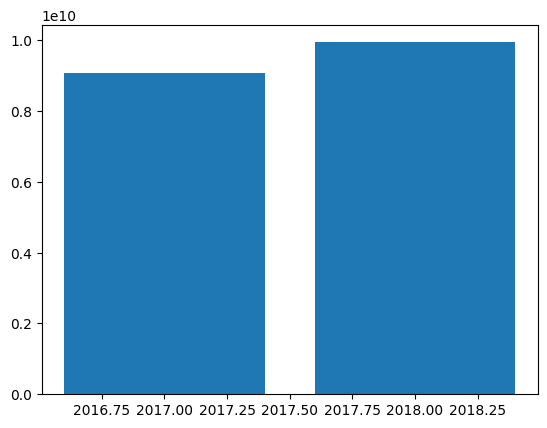

In [81]:
x = mt.index
y = mt

plt.bar(x,y)
plt.show()

In [85]:
mt = pd.pivot_table(td,index=["집행연도"], values=["집행금액"],aggfunc="sum")
mt

,집행금액
집행연도,
2017,9076941387
2018,9937556542


<AxesSubplot:ylabel='집행연도'>

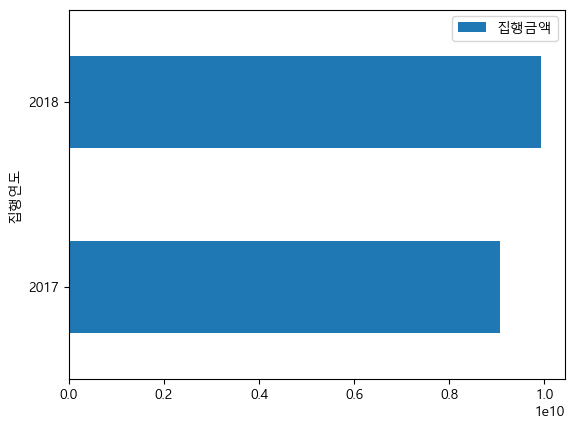

In [86]:
matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"] = False

(mt).plot.barh()

In [87]:
mt = td.groupby(["집행연도","집행일"]).sum()["집행금액"]
mt

집행연도  집행일
2017  1       710368860
      2       712679864
      3       737250454
      4       635265805
      5       647582378
      6       758257342
      7       701604626
      8       661174850
      9       806170700
      10      637219943
      11      843619171
      12     1225747394
2018  1       735587570
      2       769360005
      3       761059010
      4       703781418
      5       669044701
      6       690652154
      7       788926477
      8       730290532
      9       769404957
      10      827022975
      11      960310221
      12     1532116522
Name: 집행금액, dtype: int64

<AxesSubplot:xlabel='집행연도,집행일'>

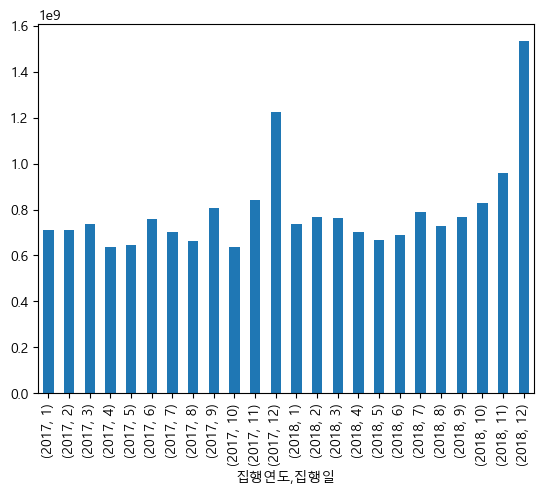

In [88]:
mt.plot.bar()